In [36]:
import numpy as np
import matplotlib.pyplot as plt


In [37]:
class SOM:
    def __init__(self, grid_size, input_dim, learning_rate=0.5, radius=1.0):
        self.grid_size = grid_size
        self.learning_rate = learning_rate
        self.radius = radius

        # Initialize weight vectors randomly
        self.weights = np.random.rand(grid_size, grid_size, input_dim)

    def _find_bmu(self, x):
        """
        Find Best Matching Unit (BMU)
        """
        distances = np.linalg.norm(self.weights - x, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def _update_weights(self, x, bmu, epoch, epochs):
        lr = self.learning_rate * (1 - epoch / epochs)
        radius = self.radius * (1 - epoch / epochs)

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                dist = np.linalg.norm(np.array([i, j]) - np.array(bmu))
                if dist <= radius:
                    self.weights[i, j] += lr * (x - self.weights[i, j])

    def train(self, data, epochs=100):
        for epoch in range(epochs):
            for x in data:
                bmu = self._find_bmu(x)
                self._update_weights(x, bmu, epoch, epochs)


In [38]:
# Simple 2D dataset
data = np.array([
    [0.1, 0.2],
    [0.2, 0.1],
    [0.8, 0.9],
    [0.9, 0.8],
    [0.4, 0.5],
    [0.45, 0.55]
])


In [39]:
som = SOM(grid_size=5, input_dim=2, learning_rate=0.5, radius=2)
som.train(data, epochs=200)


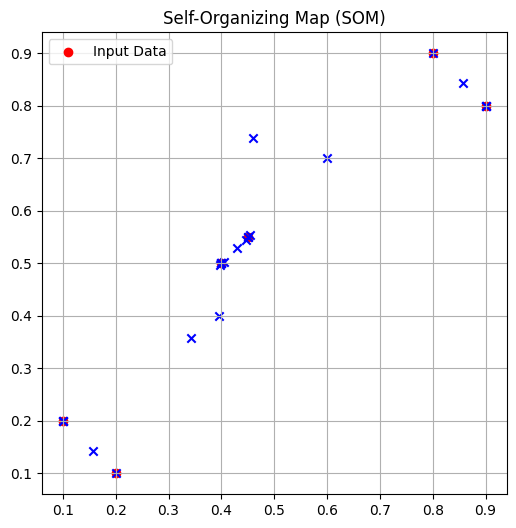

In [40]:
plt.figure(figsize=(6, 6))

# Plot data points
plt.scatter(data[:, 0], data[:, 1], c='red', label='Input Data')

# Plot SOM neurons
for i in range(som.grid_size):
    for j in range(som.grid_size):
        w = som.weights[i, j]
        plt.scatter(w[0], w[1], c='blue', marker='x')

plt.title("Self-Organizing Map (SOM)")
plt.legend()
plt.grid(True)
plt.show()
